In [1]:
import scipy.io as sio
import matlab.engine
import numpy as np

mat = matlab.engine.start_matlab()

In [2]:
from matplotlib import pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set_style("darkgrid")

In [3]:
def draw_bs_replicates(data,func,size):
    """creates a bootstrap sample, computes replicates and returns replicates array"""
    # Create an empty array to store replicates
    bs_replicates = np.empty(size)
    
    # Create bootstrap replicates as much as size
    for i in range(size):
        # Create a bootstrap sample
        bs_sample = np.random.choice(data,size=len(data))
        # Get bootstrap replicate and append to bs_replicates
        bs_replicates[i] = func(bs_sample)
    
    return bs_replicates

In [4]:
path1 = '/mnt/cube/home/lkueida/Documents/MATLAB/MemoryFinale/LOSO/Exp1/'
path2 = '/mnt/cube/home/lkueida/Documents/MATLAB/MemoryFinale/LOSO/Exp2/'
# path3 = '/mnt/cube/home/lkueida/Documents/MATLAB/MemoryFinale/LOSO/Exp3/'
# path4 = '/mnt/cube/home/lkueida/Documents/MATLAB/MemoryFinale/LOSO/Exp4/'

# subpath = 'CR_M_SN_MN/'
# subpath = 'linreg_RSF_SCRSvsSIRS_CRSNvsCRMN/'
subpath = ''

In [16]:
CRSNMN = [('CRSN','CRMN'), ([12],[10]), 'CRSN_vs_CRMN','']
SCSIRS = [('SCRS','SIRS'), ([0],[1]), 'SCRS_vs_SIRS','']
SCSIRS_CC = [('SCRS','SIRS'), ([0],[1]), 'SCRS_vs_SIRS','_CC']   # confidence control
SICR = [('SI','CR'), ([1,4,7],[10,12]), 'SI_vs_CR','']
SICR_CC = [('SI','CR'), ([1,4,7],[10,12]), 'SI_vs_CR','_CC']   # confidence control
RSF = [('RS','F'), ([0],[6,7]), 'RS_vs_F','']
FCR = [('F','CR'), ([6,7],[10,12]), 'F_vs_CR','']
FCR_CC = [('F','CR'), ([6,7],[10,12]), 'F_vs_CR','_CC']
# ROSN = [('SCSI-RO','SN'), ([3,4],[11,12]), 'SCSIRO_vs_SN']
cType = FCR_CC

In [17]:
behav_label = [(1,1),(3,1),(5,1),(1,2),(3,2),(5,2),(1,3),(3,3),(5,3),(4,4),(2,4),(4,5),(2,5)]
behav_name = ['SC-RS','SI-RS','FA-RS','SC-RO','SI-RO','FA-RO','SC-F','SI-F','FA-F','M-MN','CR-MN','M-SN','CR-SN']

In [18]:
# filename1 = path1 + subpath + 'data_' + cType[2] + '_imbalLDA_order_proj_1.mat'
# filename2 = path2 + subpath + 'data_' + cType[2] + '_imbalLDA_order_proj_2.mat'
# filename3 = path3 + subpath + 'data_' + cType[2] + '_imbalLDA_order_proj_3.mat'
# filename4 = path4 + subpath + 'data_' + cType[2] + '_imbalLDA_order_proj_4.mat'

filename1 = path1 + subpath + 'data_' + cType[2] + '_imbalLDA_order_proj_matchCRSNMN_1.mat'
filename2 = path2 + subpath + 'data_' + cType[2] + '_imbalLDA_order_proj_matchCRSNMN_2.mat'
# filename3 = path3 + subpath + 'data_' + cType[2] + '_imbalLDA_order_proj_matchCRSNMN_3.mat'
# filename4 = path4 + subpath + 'data_' + cType[2] + '_imbalLDA_order_proj_matchCRSNMN_4.mat'

In [19]:
file1 = mat.load(filename1, nargout=1)
file2 = mat.load(filename2, nargout=1)
# file3 = mat.load(filename3, nargout=1)
# file4 = mat.load(filename4, nargout=1)

user_len_1 = len(file1['user_prob_1'])
user_len_2 = len(file2['user_prob_2'])
# user_len_3 = len(file3['user_prob_3'])
# user_len_4 = len(file4['user_prob_4'])

In [20]:
stat_1 = np.zeros((13,3))

for i in range(13):
    user_score = []
    for u in range(user_len_1):

        temp_score = file1['user_prob_1'][u]
        temp_source = file1['user_source_1'][u]
        temp_resp = file1['user_resp_1'][u]
        temp_score = np.array(temp_score._data).reshape(temp_score.size, order='F')
        temp_source = np.array(temp_source._data).reshape(temp_source.size, order='F')
        temp_resp = np.array(temp_resp._data).reshape(temp_resp.size, order='F')
        b = (temp_source==behav_label[i][0]) & (temp_resp==behav_label[i][1])
        if sum(b)[0] < 5:
            continue
        user_score.append(np.mean(temp_score[b]))
        
    sample = draw_bs_replicates(user_score, np.mean, 10000)
    stat_1[i,0] = np.mean(sample)
    stat_1[i,1:] = np.percentile(sample,[2.5,97.5])
#     b_data = np.vstack(user_score)
#     stat_1[i,0] = np.mean(b_data)
#     stat_1[i,1] = 1.96*np.std(b_data)/np.sqrt(b_data.shape[0])
    

In [21]:
stat_1

array([[ 0.00330091, -0.07295155,  0.07279165],
       [ 0.05223057, -0.05425428,  0.15469006],
       [ 0.0590015 , -0.08721939,  0.18597609],
       [ 0.03615328, -0.04940585,  0.11579806],
       [-0.0334479 , -0.12176216,  0.04952735],
       [ 0.03210541, -0.07141399,  0.14893173],
       [ 0.05011941, -0.03259488,  0.13210745],
       [ 0.0265209 , -0.0540465 ,  0.1013092 ],
       [ 0.00218351, -0.10067818,  0.09977805],
       [-0.08613848, -0.16165924, -0.0031407 ],
       [-0.08278349, -0.15003202, -0.01256007],
       [-0.14966743, -0.21221052, -0.08594619],
       [-0.14158246, -0.21532888, -0.06746013]])

In [22]:
stat_2 = np.zeros((13,3))

for i in range(13):
    user_score = []
    for u in range(user_len_2):

        temp_score = file2['user_prob_2'][u]
        temp_source = file2['user_source_2'][u]
        temp_resp = file2['user_resp_2'][u]
        temp_score = np.array(temp_score._data).reshape(temp_score.size, order='F')
        temp_source = np.array(temp_source._data).reshape(temp_source.size, order='F')
        temp_resp = np.array(temp_resp._data).reshape(temp_resp.size, order='F')
        b = (temp_source==behav_label[i][0]) & (temp_resp==behav_label[i][1])
        if sum(b)[0] < 5:
            continue
        user_score.append(np.mean(temp_score[b]))
        
    sample = draw_bs_replicates(user_score, np.mean, 10000)
    stat_2[i,0] = np.mean(sample)
    stat_2[i,1:] = np.percentile(sample,[2.5,97.5])
        
#     b_data = np.vstack(user_score)
#     stat_2[i,0] = np.mean(b_data)
#     stat_2[i,1] = np.std(b_data)/np.sqrt(b_data.shape[0])
    

In [23]:
def plot_score(data, exp):
    
    other_idx = np.ones((13,))
    for c in cType[1][0]:
        other_idx[c] = 0
    for c in cType[1][1]:
        other_idx[c] = 0
    
    errors = np.abs(np.transpose(data[:,1:] - data[:,:1]))
#     print(errors)
    others = np.arange(13)[other_idx.astype(bool)]
    plt.figure()
    plt.errorbar(others, data[others,0], yerr=errors[:,others], fmt='o', capsize=3, c = 'black')
    pos = plt.errorbar(cType[1][0],data[cType[1][0],0], yerr=errors[:,cType[1][0]], fmt='o', capsize=3, c = 'limegreen')
    neg = plt.errorbar(cType[1][1],data[cType[1][1],0], yerr=errors[:,cType[1][1]], fmt='o', capsize=3, c = 'red')

    ax = plt.gca()
    ax.set_xticks(np.arange(13))
    ax.set_xticklabels(behav_name, fontsize=14)

    if exp=='1':
        pos.set_label(cType[0][0])
        neg.set_label(cType[0][1])
        legend = ax.legend(title=r'$\bf{Trained\ Classes}$', fontsize=14, frameon=False)
#         legend = ax.legend(title=r'$\bf{Trained\ Classes}$', fontsize=14,loc='best', bbox_to_anchor=(0.5, 0.5, 0.5, 0.5))
        legend.get_title().set_fontsize('12')

    plt.xticks(rotation=45)
    plt.yticks(fontsize=14)
    plt.ylabel('Classifier projection', fontsize=14);
#     plt.title('Projections onto ' + cType[0][0] + ' vs. ' + cType[0][1] + ' classifier in Exp' + exp)
    plt.tight_layout()
    
    filename = cType[0][0] + '_vs_' + cType[0][1] + cType[3] + '_subscores_Exp' + exp 
    plt.savefig(filename+'.pdf')

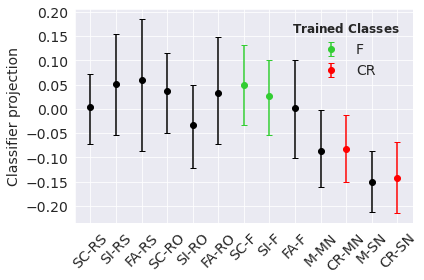

In [24]:
plot_score(stat_1, '1')

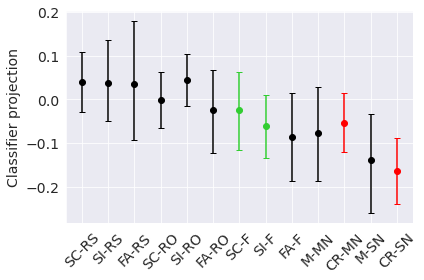

In [25]:
plot_score(stat_2, '2')

In [99]:
stat_3 = np.zeros((13,3))

for i in range(13):
    user_score = []
    for u in range(user_len_3):

        temp_score = file3['user_prob_3'][u]
        temp_source = file3['user_source_3'][u]
        temp_resp = file3['user_resp_3'][u]
        temp_score = np.array(temp_score._data).reshape(temp_score.size, order='F')
        temp_source = np.array(temp_source._data).reshape(temp_source.size, order='F')
        temp_resp = np.array(temp_resp._data).reshape(temp_resp.size, order='F')
        b = (temp_source==behav_label[i][0]) & (temp_resp==behav_label[i][1])
        if sum(b)[0] < 5:
            continue
        user_score.append(np.mean(temp_score[b]))
        
    sample = draw_bs_replicates(user_score, np.mean, 10000)
    stat_3[i,0] = np.mean(sample)
    stat_3[i,1:] = np.percentile(sample,[2.5,97.5])
        
#     b_data = np.vstack(user_score)
#     stat_3[i,0] = np.mean(b_data)
#     stat_3[i,1] = np.std(b_data)/np.sqrt(b_data.shape[0])
    

In [100]:
stat_4 = np.zeros((13,3))

for i in range(13):
    user_score = []
    for u in range(user_len_4):

        temp_score = file4['user_prob_4'][u]
        temp_source = file4['user_source_4'][u]
        temp_resp = file4['user_resp_4'][u]
        temp_score = np.array(temp_score._data).reshape(temp_score.size, order='F')
        temp_source = np.array(temp_source._data).reshape(temp_source.size, order='F')
        temp_resp = np.array(temp_resp._data).reshape(temp_resp.size, order='F')
        b = (temp_source==behav_label[i][0]) & (temp_resp==behav_label[i][1])
        if sum(b)[0] < 5:
            continue
        user_score.append(np.mean(temp_score[b]))
        
    sample = draw_bs_replicates(user_score, np.mean, 10000)
    stat_4[i,0] = np.mean(sample)
    stat_4[i,1:] = np.percentile(sample,[2.5,97.5])
        
#     b_data = np.vstack(user_score)
#     stat_4[i,0] = np.mean(b_data)
#     stat_4[i,1] = np.std(b_data)/np.sqrt(b_data.shape[0])
    

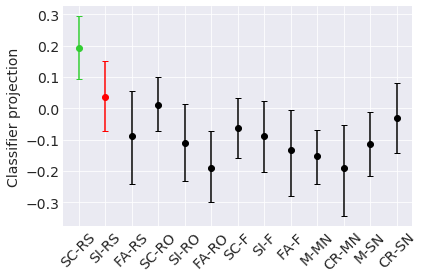

In [104]:
plot_score(stat_3, '3')

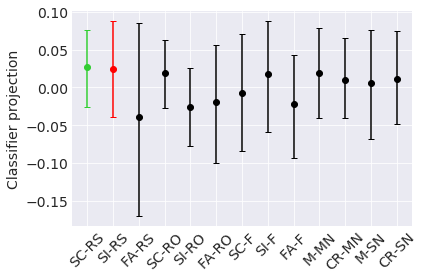

In [105]:
plot_score(stat_4, '4')

In [65]:
mean_score = np.stack((stat_1[:,0],stat_2[:,0],stat_3[:,0],stat_4[:,0]))

In [66]:
np.savetxt("SN_MN_average_proj.csv", mean_score, delimiter=",")